<a href="https://www.kaggle.com/code/jarredpriester/can-deep-learning-predict-diabetes?scriptVersionId=92224924" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Can Deep Learning Predict Diabetes?
### by Jarred Priester
### 3/16/22

### 1. Introduction
### 2. Data Cleaning
### 3. Data Visualization
### 4. Feature Engineering
### 5. Models
### 6. Results
### 7. Summary

# 1. Introduction

Diabetes is a subject that has been on my mind for quite some time now. Type 2 diabetes seems to run in my family, I decided a long time ago that I would eat a healthy diet and exercise regularly in order to prevent getting diabetes myself. As soon as I came across this data set I was curious to explore and learn more about what factors are most likely to lead to diabetes.

So what is diabetes and what leads to someone getting it? The following is from the Centers for Disease Control and Prevention (CDC)

*What Causes Type 2 Diabetes?*

*Insulin is a hormone made by your pancreas that acts like a key to let blood sugar into the cells in your body for use as energy. If you have type 2 diabetes, cells don’t respond normally to insulin; this is called insulin resistance. Your pancreas makes more insulin to try to get cells to respond. Eventually your pancreas can’t keep up, and your blood sugar rises, setting the stage for prediabetes and type 2 diabetes. High blood sugar is damaging to the body and can cause other serious health problems, such as heart disease,  vision loss, and kidney disease.*

*Symptoms and Risk Factors*

*Type 2 diabetes symptoms often develop over several years and can go on for a long time without being noticed (sometimes there aren’t any noticeable symptoms at all). Because symptoms can be hard to spot, it’s important to know the risk factors and to see your doctor to get your blood sugar tested if you have any of them.*
https://www.cdc.gov/diabetes/basics/type2.html


The data set we will be using is the PIMA Indian Diabetes data set. The PIMA Indians are a tribe in Arizona and more about their history can be found here https://en.wikipedia.org/wiki/Pima_people

The data set consist of females over the age of 21. There are a total of 9 features including outcome, which is what we will be trying to predict
1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function(A function that scores the likelihood of diabetes based on family history)
8. Age (years) 
9. Outcome (0 or 1)

A few questions that we will try to answer in this notebook:
* What feature is the most important feature for predicting the outcome?
* How does family history affect your chances of getting diabetes?
* What model best predicts diabetes based on this data?
* Can deep learning predict Diabetes?


The rest of this notebook we will try to answer these questions by downloading, exploring and cleaning the data. Then we will create 4 models and examine the results:
* Logistic Regression
* Random Forest
* K Nearest Neighbors
* Deep Neural Network

# 2. Data Cleaning

Importing the libaries

In [1]:
#data cleaning
import numpy as np
import pandas as pd

#data visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

#for setting up train and test sets
from sklearn.model_selection import train_test_split 

#logistic regression
from sklearn.linear_model import LogisticRegression

#random forest
from sklearn.ensemble import RandomForestClassifier

#K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

#Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#machine learning metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#model explaining
import eli5
from eli5.sklearn import PermutationImportance

#result table
from tabulate import tabulate

downloading the data

In [2]:
diabetes = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

First five rows of the data

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


How many observations do we have?

In [4]:
diabetes.shape

(768, 9)

Let's look at a overview of the data

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


What stands out to me is that the features Glucose, BloodPressure, SkinThickness, Insulin, BMI all have minimums of 0. The only features that should have 0s are Pregnancies and Outcome, for example having a blood presure of 0 doesn't make sense. It seems that missing observations were given the value of 0. So let's see if there are any missing observations

In [6]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

So we don't have any missing observations so I think it is safe to assume that the 0s are representing missing observations. One thing we could do is change those 0s to NaN and then drop those NaN. Another thing we could do is change those 0s to the mean or medium. Before we decide let's look at the amount of zeros in the data.

In [7]:
(diabetes == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

This is quite a lot of zeros. Insulin has the most zeros with 374, which is 48% of the observations for Insulin. If we dropped those NaN that would leave us with less than 400 observations but the data should be more realistic than replacing those NaN with the mean or median. Next we will convert the zeros to NaN and then drop those NaN.

In [8]:
#changing the 0s to NaN from the features defined in zeros
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

#dropping the newly convertered NaNs
diabetes = diabetes.dropna()

#looking at the first 20 rows
diabetes.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0


In [9]:
diabetes.shape

(392, 9)

In [10]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
(diabetes == 0).sum()

Pregnancies                  56
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     262
dtype: int64

Our data is now clean! We have no NaNs and no zeros. We are left with only 392 observations but that is the trade off we made for more realistic data. Next let's visualize the data

# 3. Data Visualization

Our first plot is the histagrams of all 9 features

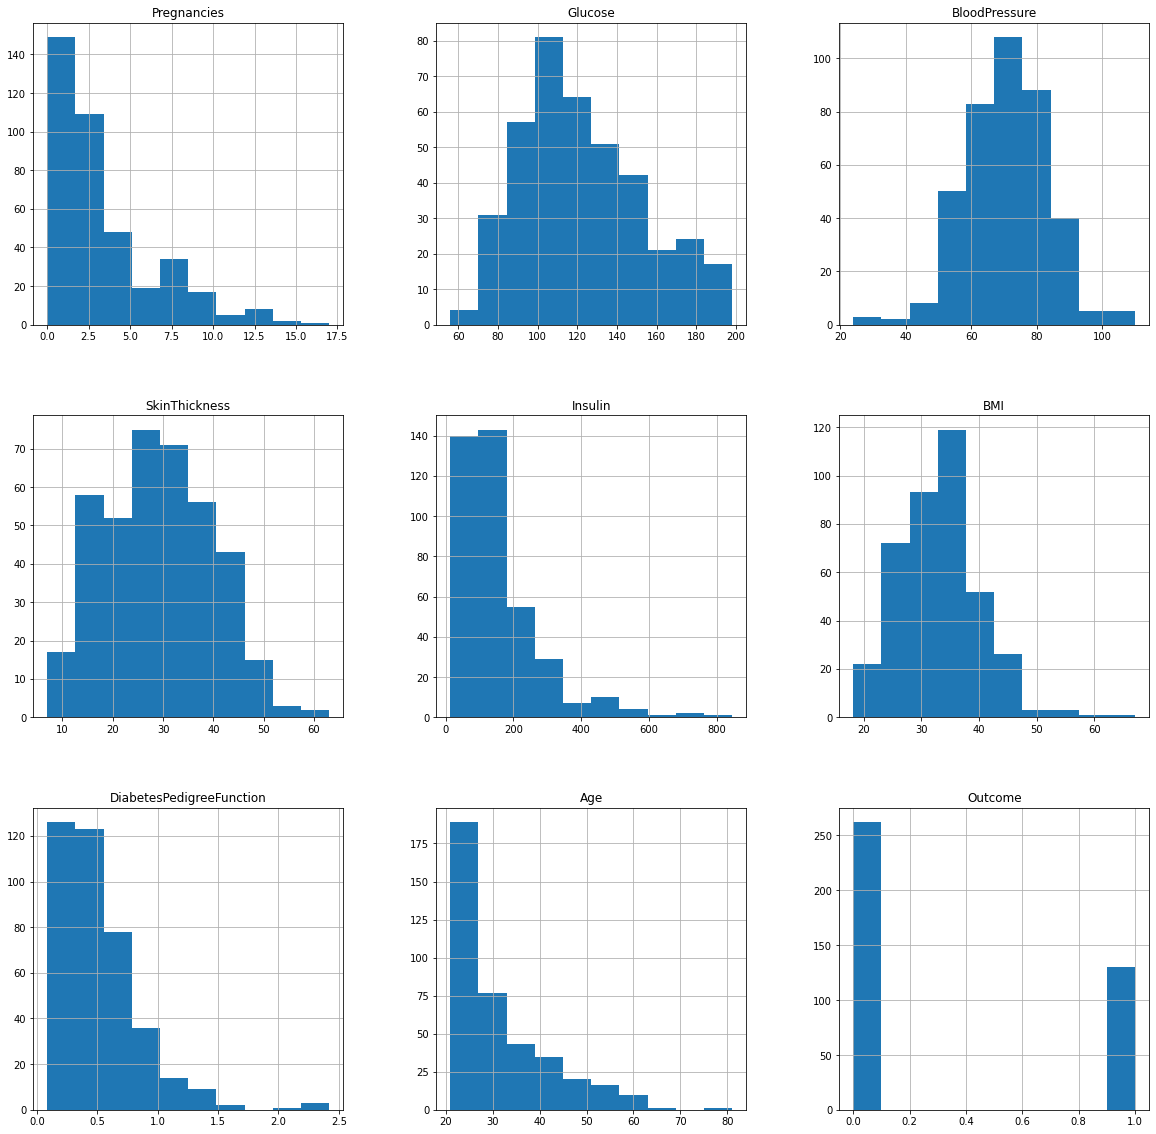

In [12]:
diabetes.hist(figsize=(20,20))
plt.show()

Our second plot is a pairplot of all 9 features. We can see that there is a clear separation between the not having diabetes and having diabetes outcomes for the glucose feature. Pregnancies and Age also show a bit of separtation but not as much as glucose.

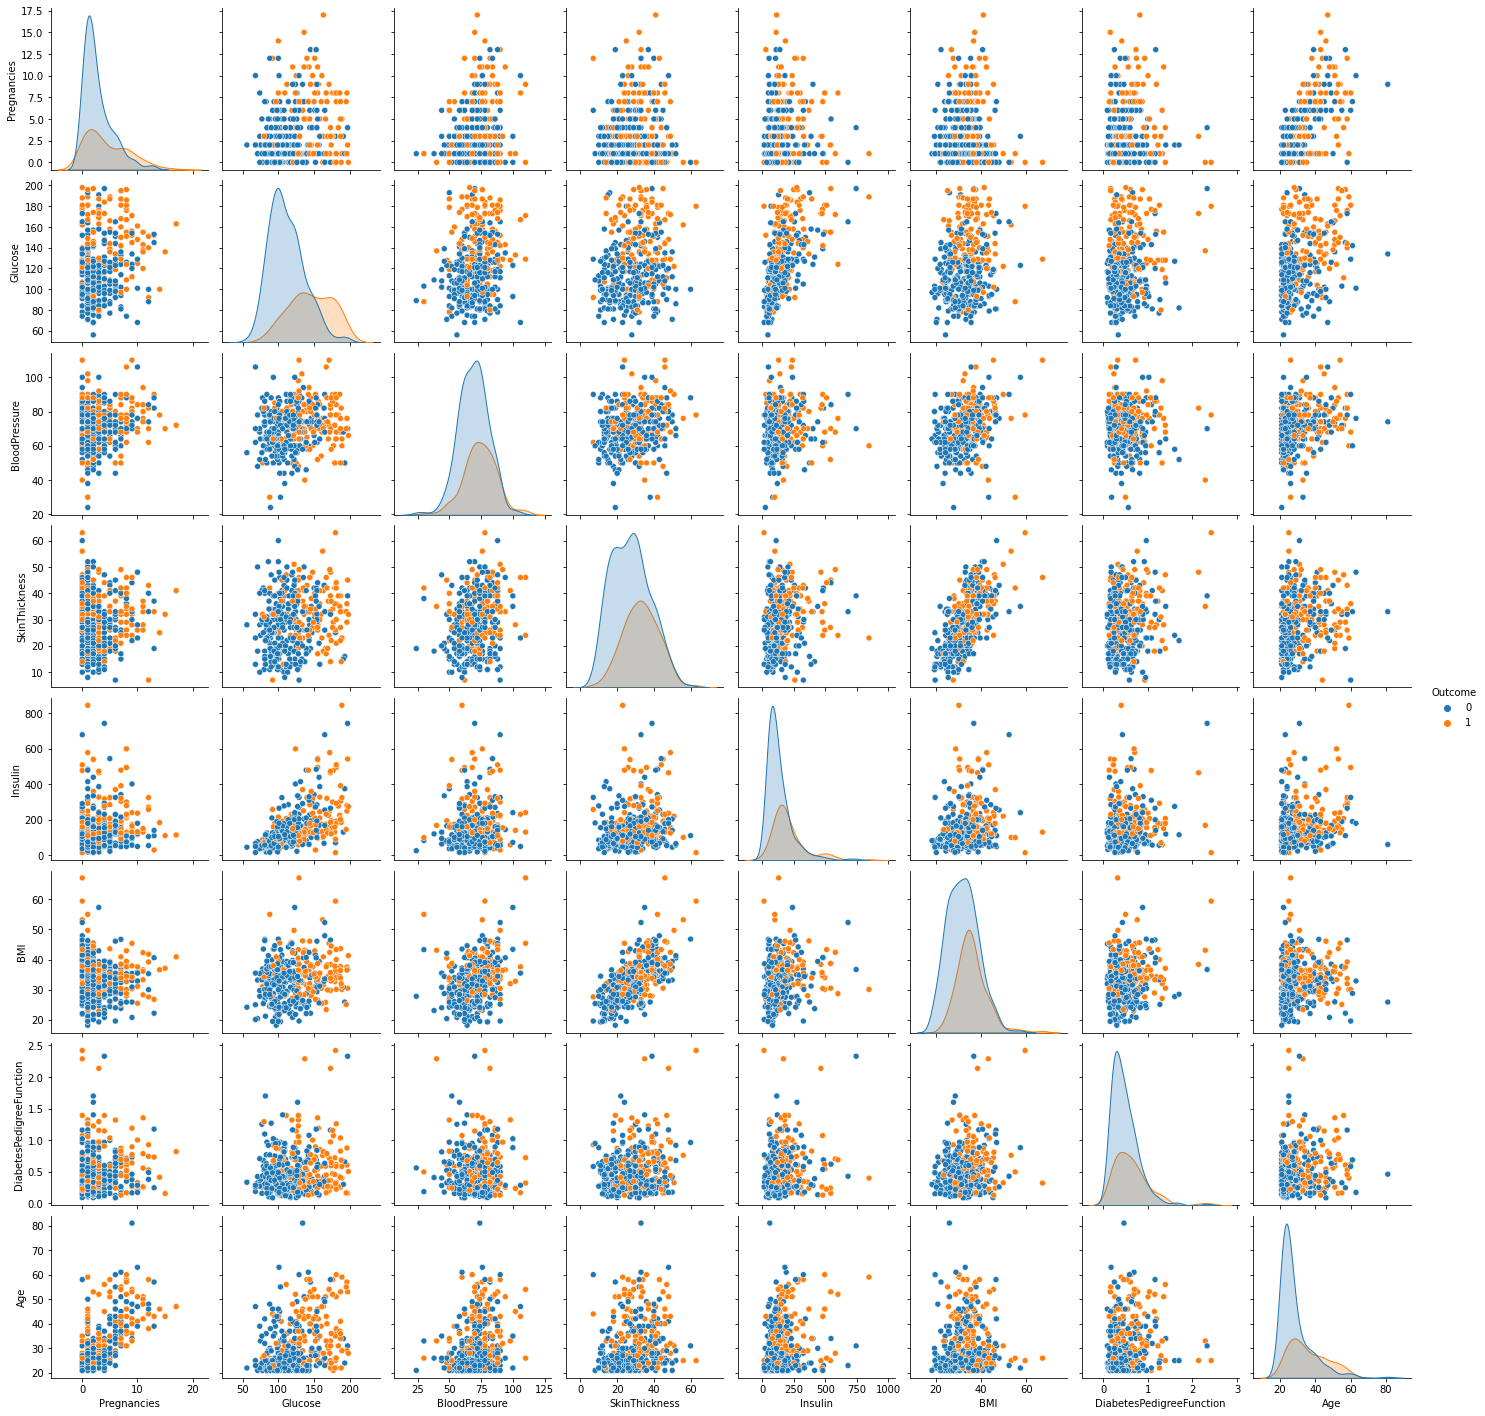

In [13]:
sns.pairplot(data=diabetes,hue='Outcome')

Our third plot is a heatmap of the correlation between the 9 features. With no surprise, glucose has the highest correlation with outcome with Age being the second highest

<AxesSubplot:>

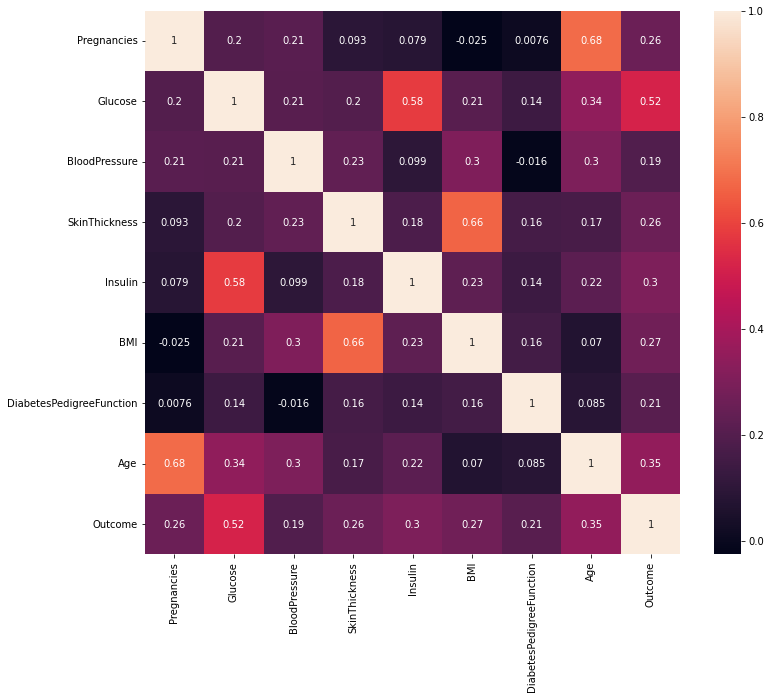

In [14]:
plt.figure(figsize = (12,10))
sns.heatmap(diabetes.corr(), annot = True)

# 4. Feature Engineering

For the first feature we will group the blood presure into 4 groups: low, ideal, pre-high and high. This grouping is based off of a chart from Blood Presure UK which can be found here https://www.bloodpressureuk.org/your-blood-pressure/understanding-your-blood-pressure/what-do-the-numbers-mean/

In [15]:
def bp_group(row):
    if row['BloodPressure'] < 60:
        return '0'
    elif row['BloodPressure'] > 60 and row['BloodPressure'] < 80:
        return '1'
    elif row['BloodPressure'] > 80 and row['BloodPressure'] < 90:
        return '2'
    else:
        return '3'

diabetes['bp'] = diabetes.apply(bp_group,axis=1)

Our second new feature we will group the BMI into 5 groups: underweight, healthy, overweight, obese, extremly obese. This grouping is based from a chart from Cigna that you can find here https://www.cigna.com/individuals-families/health-wellness/hw/body-mass-index-for-adults-zm2277

In [16]:
def bmi_group(row):
    if row['BMI'] < 18.5:
        return '0'
    elif row['BMI'] > 18.5 and row['BMI'] < 25:
        return '1'
    elif row['BMI'] > 25 and row['BMI'] < 30:
        return '2'
    elif row['BMI'] > 30 and row ['BMI'] < 40:
        return '3'
    else:
        return '4'

diabetes['bmi_status'] = diabetes.apply(bmi_group,axis=1)

The third feature we are going to group the ages into 3 groups: young, middle, senior. This is more subjective and is based who is considered a "senior" here in the states.

In [17]:
def age_group(row):
    if row['Age'] < 30:
        return '0'
    elif row['Age'] > 30 and row['Age'] > 62:
        return '1'
    else:
        return '2'

diabetes['age_group'] = diabetes.apply(age_group,axis=1)

The fourth feature is grouping pregnancies by the number of pregnancies into 3 groups: low, mid, high. This too is subjective but I am hoping that by grouping them it may smooth the inputs otu and will lead to a higher accuracy.

In [18]:
def num_preg(row):
    if row['Pregnancies'] < 2:
        return '0'
    elif row['Pregnancies'] > 2 and row['Pregnancies'] < 5:
        return '1'
    else:
        return '2'
    
diabetes['num_preg'] = diabetes.apply(num_preg,axis=1)

Our fifth new feature is going to be a ratio between glucose and insulin. Our visualization showed that glucose will be an important feature for making predictions and glucose and insulin had a high correlation compared to the other features.

In [19]:
diabetes['glucose_insulin_ratio'] = diabetes['Glucose'] / diabetes['Insulin']

Our sixth feature will be a ratio between BMI and skin thickness. These features showed a correlation so I am wanting to create a ratio with these two features as well.

In [20]:
diabetes['bmi_skinthickness_ratio'] = diabetes['BMI'] / diabetes['SkinThickness']

Our seventh new feature is going to be the product of glucose and the diabetes pedigree function. I think high glucose levels might amplify the function so we multiply them together.

In [21]:
diabetes['glucose_and_dpf'] = diabetes['Glucose'] * diabetes['DiabetesPedigreeFunction']

Our eighth and final new feature is going to be the product of age and diabetes pedigree function. The idea is the same as the previous one, age might amplify the pedigree function.

In [22]:
diabetes['age_and_dpf'] = diabetes['Age'] * diabetes['DiabetesPedigreeFunction']

Now let's take a look at the data set with the new features

In [23]:
diabetes.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bp,bmi_status,age_group,num_preg,glucose_insulin_ratio,bmi_skinthickness_ratio,glucose_and_dpf,age_and_dpf
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,2,0,0,0.946809,1.221739,14.863,3.507
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,4,2,0,0.815476,1.231429,313.456,75.504
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,0,3,0,1,0.886364,0.968750,19.344,6.448
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,1,3,2,2,0.362799,0.677778,31.126,8.374
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,3,3,2,0,0.223404,1.308696,75.222,23.482
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1,1,2,2,2,0.948571,1.357895,97.442,29.937
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1,2,4,2,0,0.513043,0.974468,65.018,17.081
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0,0,4,2,0,1.240964,1.139474,18.849,6.039
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1,1,3,2,0,1.197917,1.153333,60.835,16.928
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0,2,3,0,1,0.536170,0.958537,88.704,19.008


# 5. Models

Before creating our models we are going to scale the data

In [24]:
# creating our X and y
y = diabetes['Outcome']
X = diabetes.drop(columns = 'Outcome')

#creating our min max scaler
scaler = MinMaxScaler()

# mix-max scale the data between 0 and 1
X_scaled = scaler.fit_transform(X)

#changing back into a dataframe
X = pd.DataFrame(X_scaled, columns = X.columns)
        
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,bp,bmi_status,age_group,num_preg,glucose_insulin_ratio,bmi_skinthickness_ratio,glucose_and_dpf,age_and_dpf
0,0.058824,0.232394,0.488372,0.285714,0.096154,0.202454,0.035118,0.000000,0.333333,0.50,0.0,0.0,0.058507,0.180386,0.015617,0.018110
1,0.000000,0.570423,0.186047,0.500000,0.185096,0.509202,0.943469,0.200000,0.000000,1.00,1.0,0.0,0.048125,0.183305,0.677696,0.969143
2,0.176471,0.154930,0.302326,0.446429,0.088942,0.261759,0.069807,0.083333,0.000000,0.75,0.0,0.5,0.053729,0.104185,0.025553,0.056959
3,0.117647,0.992958,0.534884,0.678571,0.635817,0.251534,0.031263,0.533333,0.333333,0.75,1.0,1.0,0.012342,0.016542,0.051677,0.082400
4,0.058824,0.936620,0.418605,0.285714,1.000000,0.243354,0.134047,0.633333,1.000000,0.75,1.0,0.0,0.001323,0.206578,0.149452,0.281967


Next we are going to set up our traing and test sets

In [25]:
#spliting the data between X_train, X_test, y_train, y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

#printing the shape of each set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(313, 16)
(79, 16)
(313,)
(79,)


### Logistic Regression


In [26]:
#creating a logistic regression model with a set seed
logistic = LogisticRegression(random_state=0)

#training the model
logistic.fit(X_train, y_train)

#making predictions
log_pred = logistic.predict(X_test)

#getting our results
log_r_f1 = f1_score(y_test,log_pred)
log_r_auc = roc_auc_score(y_test,log_pred)
log_r_acc = accuracy_score(y_test,log_pred)

#printing the sklearn classification report
print(classification_report(y_test,log_pred))

#showing the features importance to the predictions
log_prem = PermutationImportance(logistic,random_state=0).fit(X_test,y_test)
eli5.show_weights(log_prem, feature_names = X_test.columns.tolist())

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        55
           1       0.67      0.67      0.67        24

    accuracy                           0.80        79
   macro avg       0.76      0.76      0.76        79
weighted avg       0.80      0.80      0.80        79



Weight,Feature
0.0937 ± 0.0568,Glucose
0.0329 ± 0.0258,BMI
0.0304 ± 0.0304,age_group
0.0203 ± 0.0203,SkinThickness
0.0177 ± 0.0124,bmi_skinthickness_ratio
0.0177 ± 0.0304,DiabetesPedigreeFunction
0.0152 ± 0.0189,age_and_dpf
0.0152 ± 0.0189,glucose_and_dpf
0.0152 ± 0.0248,Insulin
0.0127 ± 0.0000,glucose_insulin_ratio


### Random Forest

In [27]:
#creating a random forest classifier with a set seed
rf = RandomForestClassifier(n_estimators=50, random_state=0)

#training the model
rf.fit(X_train, y_train)

#making the predictions
rf_pred = rf.predict(X_test)

#getting our results
rf_f1 = f1_score(y_test,rf_pred)
rf_auc = roc_auc_score(y_test,rf_pred)
rf_acc = accuracy_score(y_test,rf_pred)

#printing the sklearn classification report
print(classification_report(y_test,rf_pred))

#showing feature importance
rf_prem = PermutationImportance(rf,random_state=0).fit(X_test,y_test)
eli5.show_weights(rf_prem, feature_names = X_test.columns.tolist())

              precision    recall  f1-score   support

           0       0.83      0.82      0.83        55
           1       0.60      0.62      0.61        24

    accuracy                           0.76        79
   macro avg       0.72      0.72      0.72        79
weighted avg       0.76      0.76      0.76        79



Weight,Feature
0.0861 ± 0.0911,Glucose
0.0304 ± 0.0411,BMI
0.0152 ± 0.0405,age_group
0.0152 ± 0.0372,Age
0.0127 ± 0.0160,bmi_skinthickness_ratio
0.0101 ± 0.0101,DiabetesPedigreeFunction
0.0101 ± 0.0189,BloodPressure
0.0051 ± 0.0258,Pregnancies
0.0025 ± 0.0101,bp
0.0000 ± 0.0358,glucose_insulin_ratio


### K Nearest Neighbors

In [28]:
#creating a K Neighbors Classifier with nn=5
knn = KNeighborsClassifier(n_neighbors=5)

#training the model
knn.fit(X_train, y_train)

#creating the predictions
knn_pred = knn.predict(X_test)

#getting our results
knn_f1 = f1_score(y_test,knn_pred)
knn_auc = roc_auc_score(y_test,knn_pred)
knn_acc = accuracy_score(y_test,knn_pred)

#printing the sklearn classification report
print(classification_report(y_test,knn_pred))

#showing feature importance
knn_prem = PermutationImportance(knn,random_state=0).fit(X_test,y_test)
eli5.show_weights(knn_prem, feature_names = X_test.columns.tolist())

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        55
           1       0.56      0.58      0.57        24

    accuracy                           0.73        79
   macro avg       0.69      0.69      0.69        79
weighted avg       0.74      0.73      0.74        79



Weight,Feature
0.0810 ± 0.0691,age_group
0.0532 ± 0.0336,num_preg
-0.0051 ± 0.0203,age_and_dpf
-0.0076 ± 0.0124,BMI
-0.0076 ± 0.0203,DiabetesPedigreeFunction
-0.0101 ± 0.0101,glucose_and_dpf
-0.0127 ± 0.0160,glucose_insulin_ratio
-0.0152 ± 0.0372,BloodPressure
-0.0152 ± 0.0189,bp
-0.0177 ± 0.0794,Glucose


### Deep Neural Network

2022-04-06 03:48:17.446807: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-06 03:48:17.626924: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Best Validation Loss: 0.4726
Best Validation Accuracy: 0.8354
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        55
           1       0.65      0.62      0.64        24

    accuracy                           0.78        79
   macro avg       0.75      0.74      0.74        79
weighted avg       0.78      0.78      0.78        79



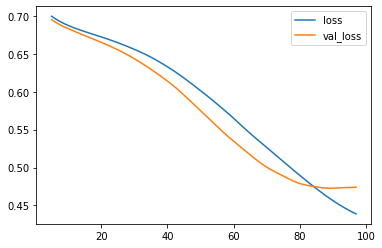

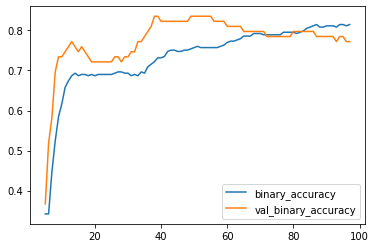

In [29]:
#setting our seed
seed = 10
tf.random.set_seed(seed)

#setting up the keras sequential model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[16]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

#compiling the model perameters
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

#traing the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

#printing the training results
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0)

#making the predictions
dnn_pred = model.predict(X_test)

#changing the predictions from probalilites to 0 or 1
dnn_rounded = np.array(dnn_pred)
dnn_rounded = np.round(dnn_rounded)

#getting our results
dnn_f1 = f1_score(y_test,dnn_rounded)
dnn_auc = roc_auc_score(y_test,dnn_rounded)
dnn_acc = accuracy_score(y_test,dnn_rounded)

#printing the sklearn classification report
print(classification_report(y_test,dnn_rounded))

# 6. Results

According to the CDC, "more than 37 million Americans have diabetes (about 1 in 10), and approximately 90-95% of them have type 2 diabetes". Since the distrubtion of outcomes is imbalanced a simple accuracy score won't tell us the complete picture. For example, if we tried to predict diabetes for everyone in the United States, a model that only predicted 'no diabetes' would be 90% accuracy since 9 out of 10 don't have diabetes. So we will include the f1 score along with ROC AUC score to give us a more complete picture of how the models preformed. 

In [30]:
#gathering the results
results = [['Logistic Regression', round(log_r_f1,2), round(log_r_auc,2), round(log_r_acc,2)],
          ['Random Forest', round(rf_f1,2), round(rf_auc,2), round(rf_acc,2)],
          ['K Nearest Neighbors', round(knn_f1,2), round(knn_auc,2), round(knn_acc,2)],
          ['Deep Neural Network', round(dnn_f1,2), round(dnn_auc,2), round(dnn_acc,2)]]

#defining header names
col_names = ["Model", "F1 Score", "ROC AUC", "Accuracy"]

#creating a results table
print(tabulate(results, headers=col_names))

Model                  F1 Score    ROC AUC    Accuracy
-------------------  ----------  ---------  ----------
Logistic Regression        0.67       0.76        0.8
Random Forest              0.61       0.72        0.76
K Nearest Neighbors        0.57       0.69        0.73
Deep Neural Network        0.64       0.74        0.78


# 7. Summary

To summarize what we have learned let us revisit the questions from the introduction

* **What feature is the most important feature for predicting the outcome?**

We found that Glucose was the most important feature in all of our models, with BMI and age also being important factors

* **How does family history affect your chances of getting diabetes?**

The diabetes pedigree function was the 6th most important feature in our models. It was important but not as important as glucose levels, bmi, age.

* **What model best predicts diabetes based on this data?**

The logistic regression model was the best preforming model with a F1 score of .67

* **Can deep learning predict Diabetes?**

Yes it can! Deep neural networks are not designed with small data sets like this one in mind, but it shows that the model was able to make good predictions and I am sure it would have a better F1 score with more data

## Thank you very much for taking the time to read this notebook! 